<a href="https://colab.research.google.com/github/prachisinhaa/Misinformation-Video-Detection/blob/main/improvements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downsampling

In [ ]:
import pandas as pd

unique_results_df = pd.read_csv('uniqueResults.csv')

In [ ]:
print("Number of samples in unique_results_df:", unique_results_df.shape[0])

Number of samples in unique_results_df: 2943


In [ ]:
# Check the number of fields in each downsampled DataFrame
#print("Number of fields in all_results_sample:", all_results_sample.shape[1])
print("Number of fields in unique_results_df:", unique_results_df.shape[1])
#print("Number of fields in all_Top10_SERP_MM_sample:", all_Top10_SERP_MM_sample.shape[1])


Number of fields in unique_results_df: 15


## Preprocessing

Basically getting the thumbnail using the Youtube API



In [ ]:
!pip install requests

In [ ]:
import pandas as pd
import os
import requests

In [ ]:
def extract_video_id(url):
    if 'v=' in url:
        return url.split('v=')[1]
    else:
        print(f"URL format not recognized: {url}")
        return None

def download_thumbnail(url, output_dir, video_id):
    response = requests.get(url)
    if response.status_code == 200:
        thumbnail_filename = os.path.join(output_dir, f"{video_id}.jpg")
        with open(thumbnail_filename, 'wb') as f:
            f.write(response.content)
        return thumbnail_filename
    else:
        print(f"Failed to download thumbnail from {url}")


In [ ]:
output_dir = 'thumbnails'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
for index, row in unique_results_df.iterrows():
    youtube_url = row['vid_url']
    video_id = extract_video_id(youtube_url)
    if video_id:
        # API request to get thumbnails ->
        api_key = "REDACTED"
        api_url = f"https://www.googleapis.com/youtube/v3/videos?id={video_id}&key={api_key}&part=snippet"
        response = requests.get(api_url)
        if response.status_code == 200:
            data = response.json()
            if 'items' in data and data['items']:
                thumbnail_url = data['items'][0]['snippet']['thumbnails']['medium']['url']
                # Downloading image
                thumbnail_filename = download_thumbnail(thumbnail_url, output_dir, video_id)
                if thumbnail_filename:
                    print(f"Thumbnail image downloaded for video ID {video_id}: {thumbnail_filename}")
            else:
                print(f"No video information found for video ID {video_id}")
        else:
            print(f"Failed to fetch video information from YouTube API for video ID {video_id}")
    else:
        print(f"No video ID found in URL: {youtube_url}")

print("Thumbnail images downloaded for all videos.")


Thumbnail image downloaded for video ID coqYraFn-B4: thumbnails/coqYraFn-B4.jpg
Thumbnail image downloaded for video ID hOW9AjskoOo: thumbnails/hOW9AjskoOo.jpg
Thumbnail image downloaded for video ID dIRcw45n9RU: thumbnails/dIRcw45n9RU.jpg
Thumbnail image downloaded for video ID SMwXKl0odq8: thumbnails/SMwXKl0odq8.jpg
Thumbnail image downloaded for video ID oHSehKtDyoI: thumbnails/oHSehKtDyoI.jpg
Thumbnail image downloaded for video ID N9COy7O7K-U: thumbnails/N9COy7O7K-U.jpg
Thumbnail image downloaded for video ID UUezq1GyAko: thumbnails/UUezq1GyAko.jpg
Thumbnail image downloaded for video ID a4z-WTkcHq4: thumbnails/a4z-WTkcHq4.jpg
Thumbnail image downloaded for video ID HK5_xobq2HE: thumbnails/HK5_xobq2HE.jpg
Thumbnail image downloaded for video ID r_UYZITc_90: thumbnails/r_UYZITc_90.jpg
Thumbnail image downloaded for video ID 5A7NxmeIg7Y: thumbnails/5A7NxmeIg7Y.jpg
Thumbnail image downloaded for video ID 7ZU7OL5MRHI: thumbnails/7ZU7OL5MRHI.jpg
Thumbnail image downloaded for video ID 

In [ ]:
!zip -r thumbnails.zip thumbnails

  adding: thumbnails/ (stored 0%)
  adding: thumbnails/agx3jbF4Nyo.jpg (deflated 0%)
  adding: thumbnails/v2MkhDtmuIQ.jpg (deflated 0%)
  adding: thumbnails/BYI9lORP44s.jpg (deflated 1%)
  adding: thumbnails/slwgXXVXM3I.jpg (deflated 0%)
  adding: thumbnails/xrmOtfZllrU.jpg (deflated 0%)
  adding: thumbnails/9czoezm2vqw.jpg (deflated 2%)
  adding: thumbnails/bgobWEK_Ny4.jpg (deflated 0%)
  adding: thumbnails/MwZ9C-FHJcg.jpg (deflated 0%)
  adding: thumbnails/tDo8se89dbQ.jpg (deflated 2%)
  adding: thumbnails/EQZYW2oBYr8.jpg (deflated 2%)
  adding: thumbnails/wz01pTvuMa0.jpg (deflated 1%)
  adding: thumbnails/bLtgS2_qxJk.jpg (deflated 0%)
  adding: thumbnails/FARFJGM8sQY.jpg (deflated 0%)
  adding: thumbnails/DPnWaBsMYnY.jpg (deflated 0%)
  adding: thumbnails/ncsy13GOtW4.jpg (deflated 1%)
  adding: thumbnails/MCK4GRSNhpg.jpg (deflated 2%)
  adding: thumbnails/p_HkLNi8cfU.jpg (deflated 0%)
  adding: thumbnails/j5SdADq9E1U.jpg (deflated 1%)
  adding: thumbnails/W8c327UcjLQ.jpg (deflated 0

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset


In [13]:
import pandas as pd
import os

csv_file = 'uniqueResults.csv'
image_folder = 'drive/MyDrive/thumbnails'

annotations_df = pd.read_csv(csv_file)

annotations_df['video_id'] = annotations_df['vid_url'].str.extract(r'(?<=v=)([\w-]+)')

# Create a new DataFrame 'id_df' with just the 'video_id' column
# Drop all columns except 'video_id' and 'annotations'
annotations_df = annotations_df[['video_id', 'normalized_annotation']].copy()

# Get a list of image names from the folder
image_names = os.listdir(image_folder)

# # Remove the '.jpg' extension from image names
image_names_without_extension = [name.replace('.jpg', '') for name in image_names]
print(len(image_names_without_extension))

filtered_annotations_df = annotations_df[annotations_df['video_id'].isin(image_names_without_extension)]
filtered_annotations_df

# Keep only unique values of 'video_id' in filtered_annotations_df
filtered_annotations_df = filtered_annotations_df.drop_duplicates(subset=['video_id'])

# Get the list of unique video IDs in filtered_annotations_df
unique_video_ids = filtered_annotations_df['video_id'].unique()

# Now filtered_annotations_df contains only unique values of 'video_id'
# Get the list of image names to delete
images_to_delete = [name + '.jpg' for name in image_names_without_extension if name not in unique_video_ids]

# Delete the images from the folder
for image_name in images_to_delete:
    image_path = os.path.join(image_folder, image_name)
    os.remove(image_path)

print(f"Deleted {len(images_to_delete)} images from the folder.")

2469
Deleted 0 images from the folder.


In [14]:
filtered_annotations_df.shape

(2469, 2)

In [ ]:
output_csv_file = 'filtered_unique_results.csv'
filtered_annotations_df.to_csv(output_csv_file, index=False)

print(f"Filtered annotations saved to {output_csv_file}.")

Filtered annotations saved to filtered_unique_results.csv.


In [11]:
import pandas as pd
filtered_annotations_df = pd.read_csv('filtered_unique_results.csv')

In [15]:
import cv2
image_folder = 'drive/MyDrive/thumbnails'
data = []
for index, row in filtered_annotations_df.iterrows():
    video_id = row['video_id']
    annotation = row['normalized_annotation']
    image_index = image_names_without_extension.index(video_id)
    image_path = os.path.join(image_folder, image_names[image_index])
    image = cv2.imread(image_path)  # Read image using OpenCV
    data.append((image, annotation))


data_size = len(data)
print("Size of the data:", data_size)

# Separate X and Y from data
X = [item[0] for item in data]  # Extract images from the tuples
Y = [item[1] for item in data]  # Extract annotations from the tuples


# Convert labels from -1, 0, 1 to 0, 1, 2
Y = [label + 1 for label in Y]


from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


import numpy as np

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

Size of the data: 2469


# CNN using EfficientNetB0

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes: neutral, promoting, debunking
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 4378278 (16.70 MB)
Trainable params: 328707 (1.25 MB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
# Training the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluation
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 176s 3s/step - loss: 0.8164 - accuracy: 0.6861 - val_loss: 0.7908 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 166s 3s/step - loss: 0.5961 - accuracy: 0.7646 - val_loss: 0.7712 - val_accuracy: 0.7089
Epoch 3/10
50/50 [==============================] - 155s 3s/step - loss: 0.4643 - accuracy: 0.8291 - val_loss: 0.7844 - val_accuracy: 0.7291
Epoch 4/10
50/50 [==============================] - 166s 3s/step - loss: 0.3504 - accuracy: 0.8842 - val_loss: 0.8525 - val_accuracy: 0.7139
Epoch 5/10
50/50 [==============================] - 166s 3s/step - loss: 0.2575 - accuracy: 0.9247 - val_loss: 0.8898 - val_accuracy: 0.6835
Epoch 6/10
50/50 [==============================] - 167s 3s/step - loss: 0.1747 - accuracy: 0.9544 - val_loss: 0.9611 - val_accuracy: 0.7063
Epoch 7/10
50/50 [==============================] - 168s 3s/step - loss: 0.1210 - accuracy: 0.9778 - val_loss: 1.0310 - val_accuracy: 0.6962
Epoch 8/10
50

## with regularisation

In [ ]:
from tensorflow.keras.layers import Dropout

# Define and compile the model with dropout
model_with_dropout = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Adding dropout layer with dropout rate of 0.5
    Dense(3, activation='softmax')  # Assuming 3 classes: neutral, promoting, debunking
])

model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model with dropout
history_dropout = model_with_dropout.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluate the model with dropout on test data
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(X_test, Y_test)
print("Test Accuracy with Dropout:", test_acc_dropout)


Epoch 1/10
50/50 [==============================] - 173s 3s/step - loss: 0.8539 - accuracy: 0.6968 - val_loss: 0.7813 - val_accuracy: 0.7215
Epoch 2/10
50/50 [==============================] - 164s 3s/step - loss: 0.6555 - accuracy: 0.7494 - val_loss: 0.7856 - val_accuracy: 0.6861
Epoch 3/10
50/50 [==============================] - 162s 3s/step - loss: 0.5949 - accuracy: 0.7772 - val_loss: 0.7730 - val_accuracy: 0.7139
Epoch 4/10
50/50 [==============================] - 154s 3s/step - loss: 0.5141 - accuracy: 0.8013 - val_loss: 0.7984 - val_accuracy: 0.7291
Epoch 5/10
50/50 [==============================] - 162s 3s/step - loss: 0.4567 - accuracy: 0.8310 - val_loss: 0.7776 - val_accuracy: 0.7291
Epoch 6/10
50/50 [==============================] - 164s 3s/step - loss: 0.4008 - accuracy: 0.8487 - val_loss: 0.8473 - val_accuracy: 0.7190
Epoch 7/10
50/50 [==============================] - 163s 3s/step - loss: 0.3350 - accuracy: 0.8886 - val_loss: 0.9144 - val_accuracy: 0.7316
Epoch 8/10
50

## complex model with fine tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model with additional layers
complex_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Increase the number of units in the dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(256, activation='relu'),  # Add another dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')
])

complex_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

complex_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 512)               655872    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)              

In [ ]:
history = complex_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = complex_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 174s 3s/step - loss: 0.8755 - accuracy: 0.6829 - val_loss: 0.7828 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 163s 3s/step - loss: 0.7407 - accuracy: 0.7234 - val_loss: 0.7831 - val_accuracy: 0.7266
Epoch 3/10
50/50 [==============================] - 164s 3s/step - loss: 0.7054 - accuracy: 0.7228 - val_loss: 0.7821 - val_accuracy: 0.7190
Epoch 4/10
50/50 [==============================] - 153s 3s/step - loss: 0.6298 - accuracy: 0.7620 - val_loss: 0.7754 - val_accuracy: 0.7241
Epoch 5/10
50/50 [==============================] - 163s 3s/step - loss: 0.5758 - accuracy: 0.7816 - val_loss: 0.7798 - val_accuracy: 0.7165
Epoch 6/10
50/50 [==============================] - 162s 3s/step - loss: 0.5119 - accuracy: 0.7956 - val_loss: 0.8751 - val_accuracy: 0.6962
Epoch 7/10
50/50 [==============================] - 155s 3s/step - loss: 0.4432 - accuracy: 0.8323 - val_loss: 0.8571 - val_accuracy: 0.6810
Epoch 8/10
50

## unfreezing some layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained EfficientNetB0 model without the top (classification) layer
basemodel = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Unfreeze some layers for fine-tuning
# Here we unfreeze the last few layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Create a new model with additional layers
unfrozen_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
unfrozen_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
unfrozen_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_15 (Dense)            (None, 512)               655872    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)              

In [ ]:
history = unfrozen_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = unfrozen_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 175s 3s/step - loss: 0.8707 - accuracy: 0.6842 - val_loss: 0.8098 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 166s 3s/step - loss: 0.7294 - accuracy: 0.7234 - val_loss: 0.7665 - val_accuracy: 0.7241
Epoch 3/10
50/50 [==============================] - 164s 3s/step - loss: 0.6699 - accuracy: 0.7361 - val_loss: 0.8085 - val_accuracy: 0.7291
Epoch 4/10
50/50 [==============================] - 165s 3s/step - loss: 0.6002 - accuracy: 0.7582 - val_loss: 0.8357 - val_accuracy: 0.7291
Epoch 5/10
50/50 [==============================] - 163s 3s/step - loss: 0.5006 - accuracy: 0.7937 - val_loss: 0.9389 - val_accuracy: 0.7316
Epoch 6/10
50/50 [==============================] - 165s 3s/step - loss: 0.4330 - accuracy: 0.8367 - val_loss: 0.8967 - val_accuracy: 0.6886
Epoch 7/10
50/50 [==============================] - 163s 3s/step - loss: 0.3394 - accuracy: 0.8753 - val_loss: 1.0584 - val_accuracy: 0.6785
Epoch 8/10
50

## freezing all layers except last one

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze all layers except for the last one
for layer in base_model.layers[:-1]:
    layer.trainable = False

last_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),  # Add dropout layer for regularization
    Dense(512, activation='relu'),  # Another dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(256, activation='relu'),  # Another dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')  # Assuming 3 classes: neutral, promoting, debunking
])
last_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

last_model.summary()


16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                         

In [ ]:
last_history = last_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = last_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 22s 208ms/step - loss: 0.9230 - accuracy: 0.6715 - val_loss: 0.8153 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 4s 82ms/step - loss: 0.8268 - accuracy: 0.6981 - val_loss: 0.7846 - val_accuracy: 0.7190
Epoch 3/10
50/50 [==============================] - 4s 85ms/step - loss: 0.7764 - accuracy: 0.7127 - val_loss: 0.8070 - val_accuracy: 0.7215
Epoch 4/10
50/50 [==============================] - 5s 95ms/step - loss: 0.7352 - accuracy: 0.7266 - val_loss: 0.7674 - val_accuracy: 0.7165
Epoch 5/10
50/50 [==============================] - 5s 92ms/step - loss: 0.6567 - accuracy: 0.7335 - val_loss: 0.7989 - val_accuracy: 0.7266
Epoch 6/10
50/50 [==============================] - 4s 84ms/step - loss: 0.6286 - accuracy: 0.7570 - val_loss: 0.7986 - val_accuracy: 0.7089
Epoch 7/10
50/50 [==============================] - 4s 86ms/step - loss: 0.5614 - accuracy: 0.7791 - val_loss: 0.8356 - val_accuracy: 0.6785
Epoch 8/10


## lowering learning rate

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze all layers except for the last one
for layer in base_model.layers[:-1]:
    layer.trainable = False

# Add more layers to the model for deeper feature extraction
low_rate_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),  # Add batch normalization
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),  # Add batch normalization
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Adjust the learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the new optimizer
low_rate_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
low_rate_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                      

In [ ]:
low_rate_history = low_rate_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = low_rate_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
50/50 [==============================] - 16s 129ms/step - loss: 1.7783 - accuracy: 0.3006 - val_loss: 1.0879 - val_accuracy: 0.3949
Epoch 2/10
50/50 [==============================] - 4s 88ms/step - loss: 1.3618 - accuracy: 0.4272 - val_loss: 0.9978 - val_accuracy: 0.5671
Epoch 3/10
50/50 [==============================] - 4s 86ms/step - loss: 1.1636 - accuracy: 0.5070 - val_loss: 0.9377 - val_accuracy: 0.6329
Epoch 4/10
50/50 [==============================] - 4s 85ms/step - loss: 1.0758 - accuracy: 0.5778 - val_loss: 0.8863 - val_accuracy: 0.6911
Epoch 5/10
50/50 [==============================] - 4s 88ms/step - loss: 1.0701 - accuracy: 0.5975 - val_loss: 0.8559 - val_accuracy: 0.7063
Epoch 6/10
50/50 [==============================] - 4s 85ms/step - loss: 0.9998 - accuracy: 0.6203 - val_loss: 0.8408 - val_accuracy: 0.6937
Epoch 7/10
50/50 [==============================] - 4s 85ms/step - loss: 1.0037 - accuracy: 0.6348 - val_loss: 0.8194 - val_accuracy: 0.7114
Epoch 8/10


## increasing epochs of complex efficient net model with fine tuning


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model with additional layers
epoch_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Increase the number of units in the dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(256, activation='relu'),  # Add another dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')
])

epoch_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epoch_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_20 (Dense)            (None, 512)               655872    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)              

In [ ]:
epoch_history = epoch_model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = epoch_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/20
50/50 [==============================] - 6s 125ms/step - loss: 0.8027 - accuracy: 0.7146 - val_loss: 0.7612 - val_accuracy: 0.7190
Epoch 2/20
50/50 [==============================] - 4s 84ms/step - loss: 0.7202 - accuracy: 0.7380 - val_loss: 0.7846 - val_accuracy: 0.7190
Epoch 3/20
50/50 [==============================] - 4s 86ms/step - loss: 0.6570 - accuracy: 0.7570 - val_loss: 0.7706 - val_accuracy: 0.7013
Epoch 4/20
50/50 [==============================] - 4s 85ms/step - loss: 0.6262 - accuracy: 0.7525 - val_loss: 0.7799 - val_accuracy: 0.7139
Epoch 5/20
50/50 [==============================] - 4s 89ms/step - loss: 0.5279 - accuracy: 0.7994 - val_loss: 0.7726 - val_accuracy: 0.7190
Epoch 6/20
50/50 [==============================] - 4s 87ms/step - loss: 0.4931 - accuracy: 0.8025 - val_loss: 0.8182 - val_accuracy: 0.7063
Epoch 7/20
50/50 [==============================] - 4s 86ms/step - loss: 0.4303 - accuracy: 0.8297 - val_loss: 0.8493 - val_accuracy: 0.6886
Epoch 8/20
5

## making model more complex

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model with additional layers
dense_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1024, activation='relu'),  # dense layer
    Dropout(0.5),                     # Add dropout layer
    Dense(512, activation='relu'),  # Add another dense layer
    Dropout(0.5),                    # Add dropout layer
    Dense(256, activation='relu'),  # Add another dense layer
    Dropout(0.5),                    # Add dropout layer
    Dense(3, activation='softmax')
])

dense_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

dense_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 2048)              2623488   
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                      

In [17]:
dense_history = dense_model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = dense_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/20
50/50 [==============================] - 233s 5s/step - loss: 0.3473 - accuracy: 0.8753 - val_loss: 1.0521 - val_accuracy: 0.6835
Epoch 2/20
50/50 [==============================] - 202s 4s/step - loss: 0.3023 - accuracy: 0.8905 - val_loss: 1.2897 - val_accuracy: 0.7063
Epoch 3/20
50/50 [==============================] - 202s 4s/step - loss: 0.2789 - accuracy: 0.8924 - val_loss: 1.4120 - val_accuracy: 0.6203
Epoch 4/20
50/50 [==============================] - 200s 4s/step - loss: 0.2957 - accuracy: 0.8987 - val_loss: 1.1945 - val_accuracy: 0.6785
Epoch 5/20
50/50 [==============================] - 194s 4s/step - loss: 0.3211 - accuracy: 0.8854 - val_loss: 1.1280 - val_accuracy: 0.6861
Epoch 6/20
50/50 [==============================] - 195s 4s/step - loss: 0.2741 - accuracy: 0.8981 - val_loss: 1.4158 - val_accuracy: 0.6177
Epoch 7/20
50/50 [==============================] - 194s 4s/step - loss: 0.2970 - accuracy: 0.8892 - val_loss: 1.2432 - val_accuracy: 0.6405
Epoch 8/20
50

In [21]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, classification_report, confusion_matrix
import seaborn as sns

y_pred_prob = dense_model.predict(X_test)

# Get predicted class labels by finding the index of the maximum probability
y_pred = np.argmax(y_pred_prob, axis=1)


# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate F2 score (assuming binary classification)
f2_score = fbeta_score(Y_test, y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score)

# Generate classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))



16/16 [==============================] - 55s 3s/step
Accuracy: 0.13157894736842105
Precision: 0.6540652877048653
F2 Score: 0.09121984046888777

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.12        81
           1       0.84      0.04      0.08       365
           2       0.10      0.83      0.18        48

    accuracy                           0.13       494
   macro avg       0.36      0.33      0.13       494
weighted avg       0.65      0.13      0.10       494



## b1

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model_b1 = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model_b1.trainable = False

# Create a new model on top
b1_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
b1_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

b1_model.summary()

27018416/27018416 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 6, 10, 1280)       4049571   
 )                                                               
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_15 (Dense)            (None, 256)               327936    
                                                                 
 dense_16 (Dense)            (None, 3)                 771       
                                                                 
Total params: 4378278 (16.70 MB)
Trainable params: 328707 (1.25 MB)
Non-trainable params: 4049571 (15.45 MB)
____________

In [24]:
b1_history = b1_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = b1_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 193s 4s/step - loss: 0.8353 - accuracy: 0.6924 - val_loss: 0.7884 - val_accuracy: 0.7139
Epoch 2/10
50/50 [==============================] - 185s 4s/step - loss: 0.5930 - accuracy: 0.7652 - val_loss: 0.7549 - val_accuracy: 0.7241
Epoch 3/10
50/50 [==============================] - 187s 4s/step - loss: 0.4763 - accuracy: 0.8259 - val_loss: 0.7964 - val_accuracy: 0.7266
Epoch 4/10
50/50 [==============================] - 189s 4s/step - loss: 0.3587 - accuracy: 0.8741 - val_loss: 0.7992 - val_accuracy: 0.7190
Epoch 5/10
50/50 [==============================] - 182s 4s/step - loss: 0.2622 - accuracy: 0.9222 - val_loss: 0.8553 - val_accuracy: 0.6835
Epoch 6/10
50/50 [==============================] - 177s 4s/step - loss: 0.1837 - accuracy: 0.9563 - val_loss: 0.9464 - val_accuracy: 0.6911
Epoch 7/10
50/50 [==============================] - 182s 4s/step - loss: 0.1232 - accuracy: 0.9785 - val_loss: 0.9723 - val_accuracy: 0.6962
Epoch 8/10
50

## fine tuned b1


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained EfficientNetB0 model without the top (classification) layer
base_model_b1 = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze the pre-trained weights
base_model_b1.trainable = False

# Create a new model with additional layers
complex_model_b1 = Sequential([
    base_model_b1,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Increase the number of units in the dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(256, activation='relu'),  # Add another dense layer
    Dropout(0.5),  # Add dropout layer
    Dense(3, activation='softmax')
])

complex_model_b1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

complex_model_b1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 6, 10, 1280)       6575239   
 )                                                               
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 512)               655872    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)              

In [26]:
complex_b1_history = complex_model_b1.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

test_loss, test_acc = complex_model_b1.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
50/50 [==============================] - 314s 6s/step - loss: 0.8760 - accuracy: 0.6772 - val_loss: 0.7720 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 257s 5s/step - loss: 0.7626 - accuracy: 0.7051 - val_loss: 0.7550 - val_accuracy: 0.7241
Epoch 3/10
50/50 [==============================] - 286s 6s/step - loss: 0.6925 - accuracy: 0.7278 - val_loss: 0.7617 - val_accuracy: 0.7291
Epoch 4/10
50/50 [==============================] - 288s 6s/step - loss: 0.6342 - accuracy: 0.7481 - val_loss: 0.7995 - val_accuracy: 0.7316
Epoch 5/10
50/50 [==============================] - 287s 6s/step - loss: 0.5777 - accuracy: 0.7785 - val_loss: 0.7964 - val_accuracy: 0.7266
Epoch 6/10
50/50 [==============================] - 292s 6s/step - loss: 0.5307 - accuracy: 0.7918 - val_loss: 0.7981 - val_accuracy: 0.7190
Epoch 7/10
50/50 [==============================] - 256s 5s/step - loss: 0.4445 - accuracy: 0.8266 - val_loss: 0.8641 - val_accuracy: 0.7165
Epoch 8/10
50

# resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 320, 3))

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add more layers to the model for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes: neutral, promoting, debunking

# Create the final model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
resnet_model.summary()


94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 180, 320, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 326, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 160, 64)          9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 160, 64)          256       ['conv1_conv[0][0]']          
 on)                         

## training

In [ ]:
resnet_history = resnet_model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
50/50 [==============================] - 20s 263ms/step - loss: 1.4652 - accuracy: 0.5867 - val_loss: 0.7922 - val_accuracy: 0.7190
Epoch 2/10
50/50 [==============================] - 6s 130ms/step - loss: 0.9002 - accuracy: 0.6753 - val_loss: 0.8668 - val_accuracy: 0.7190
Epoch 3/10
50/50 [==============================] - 7s 132ms/step - loss: 0.8386 - accuracy: 0.7019 - val_loss: 0.8728 - val_accuracy: 0.7190
Epoch 4/10
50/50 [==============================] - 6s 129ms/step - loss: 0.8228 - accuracy: 0.7038 - val_loss: 0.8102 - val_accuracy: 0.7190
Epoch 5/10
50/50 [==============================] - 7s 131ms/step - loss: 0.7935 - accuracy: 0.7101 - val_loss: 0.8218 - val_accuracy: 0.7190
Epoch 6/10
50/50 [==============================] - 6s 127ms/step - loss: 0.8004 - accuracy: 0.7114 - val_loss: 0.8073 - val_accuracy: 0.7190
Epoch 7/10
50/50 [==============================] - 6s 130ms/step - loss: 0.7672 - accuracy: 0.7234 - val_loss: 0.8587 - val_accuracy: 0.7241
Epoch

## results

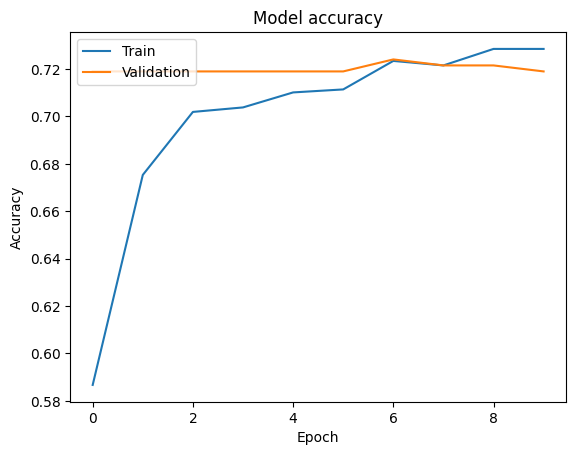

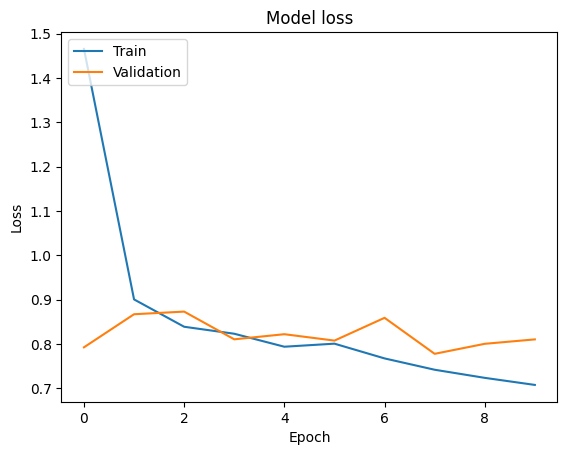

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


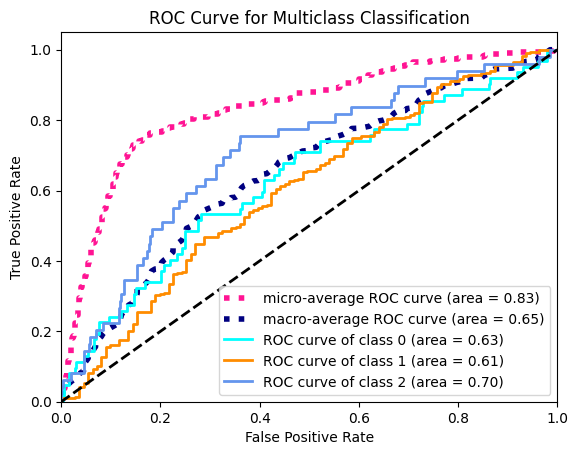

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_val_binarized = label_binarize(Y_val, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 3
for i in range(num_classes):  # num_classes is the number of classes (3 in this case)
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


13/13 [==============================] - 1s 102ms/step


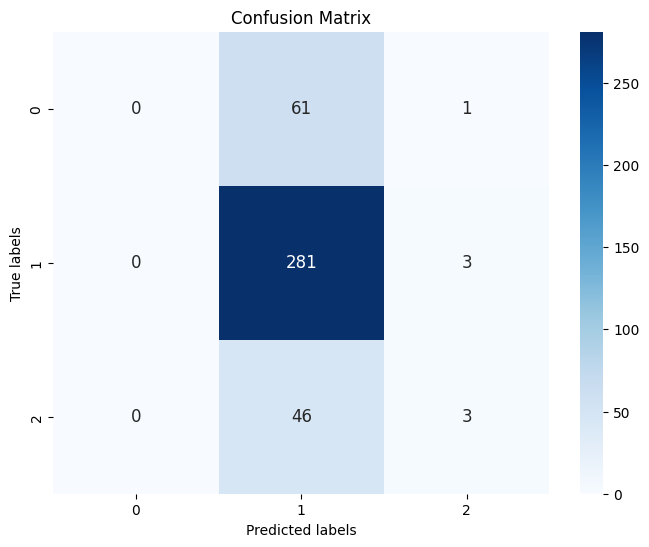

In [ ]:
# Get predicted probabilities for the validation set
y_pred_prob = resnet_model.predict(X_val)

# Get predicted classes by taking the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
